In [27]:
import yfinance as yf
import pandas as pd
import numpy as np


In [ ]:
# Fetch Nifty-50 and VIX daily
nifty_data = yf.download('^NSEI', start='2020-01-01', end='2026-01-26')
vix_data = yf.download('^INDIAVIX', start='2020-01-01', end='2026-01-26')

In [6]:
nifty_data['Close']

Ticker,^NSEI
Date,
2020-01-01,12182.500000
2020-01-02,12282.200195
2020-01-03,12226.650391
2020-01-06,11993.049805
2020-01-07,12052.950195
...,...
2026-01-19,25585.500000
2026-01-20,25232.500000
2026-01-21,25157.500000


In [8]:
vix_data['Close']

Ticker,^INDIAVIX
Date,
2020-01-02,11.49
2020-01-03,12.70
2020-01-06,14.78
2020-01-07,14.61
2020-01-08,15.64
...,...
2026-01-19,11.83
2026-01-20,12.73
2026-01-21,13.78


In [24]:
#combine vix_df, nifty_df into single dataframe and backfill for missing dates
df = pd.concat([nifty_data['Close'], nifty_data['High'], nifty_data['Low'], nifty_data['Volume'], vix_data['Close']], axis=1, keys=['nifty_close', 'nifty_high', 'nifty_low', 'nifty_volume', 'india_vix'])
df = df.bfill()

In [25]:
df

,nifty_close,nifty_high,nifty_low,nifty_volume,india_vix
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^INDIAVIX
Date,,,,,
2020-01-01,12182.500000,12222.200195,12165.299805,304100,11.49
2020-01-02,12282.200195,12289.900391,12195.250000,407700,11.49
2020-01-03,12226.650391,12265.599609,12191.349609,428800,12.70
2020-01-06,11993.049805,12179.099609,11974.200195,396500,14.78
2020-01-07,12052.950195,12152.150391,12005.349609,447800,14.61
...,...,...,...,...,...
2026-01-19,25585.500000,25653.300781,25494.349609,443100,11.83
2026-01-20,25232.500000,25585.000000,25171.349609,409800,12.73


In [28]:
df['returns'] = df['nifty_close'].pct_change()
df['volatility_20d'] = df['returns'].rolling(20).std()
df['price_log_norm'] = np.log(df['nifty_close'] / df['nifty_close'].median())
df['vix_norm'] = (df['india_vix'] - df['india_vix'].mean()) / df['india_vix'].std()


In [29]:
df

,nifty_close,nifty_high,nifty_low,nifty_volume,india_vix,returns,volatility_20d,price_log_norm,vix_norm
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^INDIAVIX,,,,
Date,,,,,,,,,
2020-01-01,12182.500000,12222.200195,12165.299805,304100,11.49,NaN,NaN,-0.391921,-0.766396
2020-01-02,12282.200195,12289.900391,12195.250000,407700,11.49,0.008184,NaN,-0.383771,-0.766396
2020-01-03,12226.650391,12265.599609,12191.349609,428800,12.70,-0.004523,NaN,-0.388304,-0.609439
2020-01-06,11993.049805,12179.099609,11974.200195,396500,14.78,-0.019106,NaN,-0.407595,-0.339630
2020-01-07,12052.950195,12152.150391,12005.349609,447800,14.61,0.004995,NaN,-0.402612,-0.361681
...,...,...,...,...,...,...,...,...,...
2026-01-19,25585.500000,25653.300781,25494.349609,443100,11.83,-0.004236,0.004877,0.350104,-0.722293
2026-01-20,25232.500000,25585.000000,25171.349609,409800,12.73,-0.013797,0.005486,0.336211,-0.605548


In [30]:
# Rolling 252-day (1-year) historical VaR at 95% confidence
df['true_var_95'] = df['returns'].rolling(252).quantile(0.05).abs()
df

,nifty_close,nifty_high,nifty_low,nifty_volume,india_vix,returns,volatility_20d,price_log_norm,vix_norm,true_var_95
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^INDIAVIX,,,,,
Date,,,,,,,,,,
2020-01-01,12182.500000,12222.200195,12165.299805,304100,11.49,NaN,NaN,-0.391921,-0.766396,NaN
2020-01-02,12282.200195,12289.900391,12195.250000,407700,11.49,0.008184,NaN,-0.383771,-0.766396,NaN
2020-01-03,12226.650391,12265.599609,12191.349609,428800,12.70,-0.004523,NaN,-0.388304,-0.609439,NaN
2020-01-06,11993.049805,12179.099609,11974.200195,396500,14.78,-0.019106,NaN,-0.407595,-0.339630,NaN
2020-01-07,12052.950195,12152.150391,12005.349609,447800,14.61,0.004995,NaN,-0.402612,-0.361681,NaN
...,...,...,...,...,...,...,...,...,...,...
2026-01-19,25585.500000,25653.300781,25494.349609,443100,11.83,-0.004236,0.004877,0.350104,-0.722293,0.010082
2026-01-20,25232.500000,25585.000000,25171.349609,409800,12.73,-0.013797,0.005486,0.336211,-0.605548,0.010161


In [33]:
df.fillna(0, inplace=True)

,nifty_close,nifty_high,nifty_low,nifty_volume,india_vix,returns,volatility_20d,price_log_norm,vix_norm,true_var_95
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^INDIAVIX,,,,,
Date,,,,,,,,,,
2020-01-01,12182.500000,12222.200195,12165.299805,304100,11.49,0.000000,0.000000,-0.391921,-0.766396,0.000000
2020-01-02,12282.200195,12289.900391,12195.250000,407700,11.49,0.008184,0.000000,-0.383771,-0.766396,0.000000
2020-01-03,12226.650391,12265.599609,12191.349609,428800,12.70,-0.004523,0.000000,-0.388304,-0.609439,0.000000
2020-01-06,11993.049805,12179.099609,11974.200195,396500,14.78,-0.019106,0.000000,-0.407595,-0.339630,0.000000
2020-01-07,12052.950195,12152.150391,12005.349609,447800,14.61,0.004995,0.000000,-0.402612,-0.361681,0.000000
...,...,...,...,...,...,...,...,...,...,...
2026-01-19,25585.500000,25653.300781,25494.349609,443100,11.83,-0.004236,0.004877,0.350104,-0.722293,0.010082
2026-01-20,25232.500000,25585.000000,25171.349609,409800,12.73,-0.013797,0.005486,0.336211,-0.605548,0.010161


In [ ]:
from arch import arch_model

returns_train = df.loc['2020-01-01':'2024-12-31', 'returns']
model = arch_model(returns_train * 100, vol='Garch', p=1, q=1)
garch_fitted = model.fit(disp='off')
print(garch_fitted.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1687.26
Distribution:                  Normal   AIC:                           3382.52
Method:            Maximum Likelihood   BIC:                           3403.00
                                        No. Observations:                 1236
Date:                Sat, Jan 31 2026   Df Residuals:                     1235
Time:                        01:16:12   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0859  2.681e-02      3.205  1.352e-03 [3.337e-0

In [ ]:
def garch_var_fit_predict(returns, horizon=1, vix=None):
    """
    Fit GARCH(1,1) to returns, optionally conditioning on VIX.
    Predict 1-step VaR at 95% confidence.
    """
    # Fit GARCH
    model = arch_model(returns * 100, vol='Garch', p=1, q=1)
    fitted_model = model.fit(disp='off')
    
    # 1-step ahead forecast
    forecast = fitted_model.forecast(horizon=horizon)
    sigma_t1 = np.sqrt(forecast.variance.iloc[-1, 0]) / 100  # unscale
    
    # Compute VaR with 1.645 critical value (95% confidence)
    from scipy.stats import norm
    z_95 = norm.ppf(0.95)  # 1.645
    var_pred = abs(z_95 * sigma_t1)
    
    return var_pred, fitted_model

In [ ]:
mape_garch = 0
for t in final_df.loc['2025-01-01':'2025-12-31'].index:
    returns_window = final_df['returns'][:t][-252:]  # rolling 252-day window
    var_pred, _ = garch_var_fit_predict(returns_window, vix=None)
    true_var = abs(np.percentile(returns_window, 5))
    mape_garch += abs((true_var - var_pred) / true_var)
mape_garch /= 252
mape_garch

np.float64(0.15299089393349985)

In [ ]:
#save the models in models directory
import pickle
pickle.dump(garch_fitted, open('../models/garch_model.pkl', 'wb'))



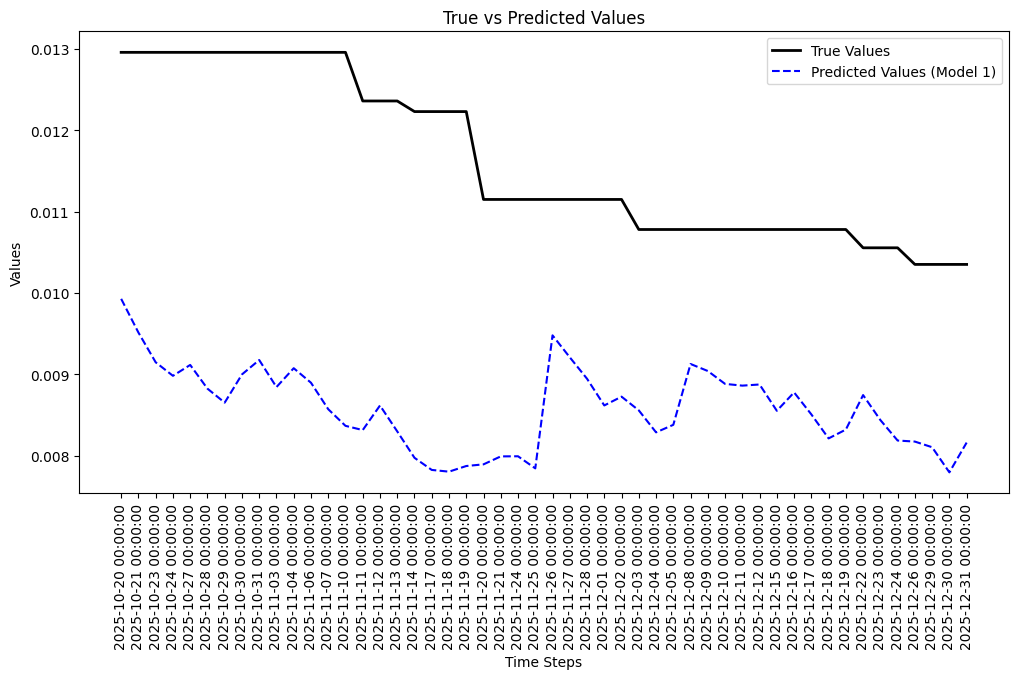

In [ ]:
#create a predicted vs actual plot for both models
import matplotlib.pyplot as plt



# Assuming you have the true and predicted values for both models
true_values = []  # Replace with your true values
predicted_values_model = []  # Replace with your model 1 predictions
timesteps = []

for t in df.loc['2025-01-01':'2025-12-31'].index:
    returns_window = df['returns'][:t][-252:]  # rolling 252-day window
    var_pred, _ = garch_var_fit_predict(returns_window, vix=None)
    true_var = abs(np.percentile(returns_window, 5))
    true_values.append(true_var)
    predicted_values_model.append(var_pred)
    timesteps.append(t)

plt.figure(figsize=(12, 6))
plt.plot(true_values[-50:], label='True Values', color='black', linewidth=2)
plt.plot(predicted_values_model[-50:], label='Predicted Values (Model 1)', color='blue', linestyle='--')
plt.xticks(ticks=np.arange(len(timesteps[-50:])), labels=timesteps[-50:], rotation=90)
plt.title('True vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.show()